In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

## Transacciones del client al mes 

In [2]:
df_transacciones = pd.read_csv("../data/DATA_TRANSAC_CANALES_F.csv")

In [3]:
df_transacciones.head().T

,0,1,2,3,4
PERIODO,201809.0,201809.0,201811.0,201804.0,201811.0
ID_CLIENTE,60967.0,26826.0,27945.0,43613.0,11691.0
CT_RECAUDO,NaN,NaN,NaN,2.0,NaN
RGO_MTO_RECAUDO,7.0,18.0,1.0,19.0,7.0
CT_TRANSF_INTE,NaN,NaN,NaN,NaN,3.0
RGO_MTO_TRANSF_INTE,11.0,8.0,9.0,3.0,19.0
CT_CHEQUE_REC,NaN,NaN,5049.0,NaN,NaN
RGO_MTO_CHEQUE_REC,13.0,9.0,16.0,2.0,3.0
CT_TRANSFE_LOCALES,561.0,1683.0,1122.0,NaN,NaN
RGO_MTO_TRANSFE_LOCALES,20.0,20.0,20.0,1.0,1.0


In [6]:
df_transacciones.describe().T

,count,mean,std,min,25%,50%,75%,max
PERIODO,77009.0,201810.509901,43.485434,201705.0,201807.0,201809.0,201811.0,201901.0
ID_CLIENTE,77009.0,50177.624459,28822.114675,5.0,25178.0,49991.0,75129.0,99989.0
CT_RECAUDO,4629.0,77.929142,188.115848,1.0,3.0,9.0,50.0,2037.0
RGO_MTO_RECAUDO,77009.0,9.959018,5.650495,1.0,5.0,10.0,15.0,20.0
CT_TRANSF_INTE,10257.0,2.159891,1.954329,1.0,1.0,1.0,3.0,34.0
RGO_MTO_TRANSF_INTE,77009.0,10.596073,5.817676,1.0,6.0,11.0,16.0,20.0
CT_CHEQUE_REC,26272.0,5566.368910,9775.499631,51.0,1122.0,2805.0,6171.0,254694.0
RGO_MTO_CHEQUE_REC,77009.0,10.507993,5.757732,1.0,6.0,10.0,16.0,20.0
CT_TRANSFE_LOCALES,47076.0,5890.489166,11062.733066,51.0,561.0,2244.0,6171.0,420750.0
RGO_MTO_TRANSFE_LOCALES,77009.0,10.117804,5.809300,1.0,5.0,10.0,15.0,20.0


In [8]:
df_transacciones.info() # floats?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77009 entries, 0 to 77008
Data columns (total 14 columns):
PERIODO                    77009 non-null int64
ID_CLIENTE                 77009 non-null int64
CT_RECAUDO                 4629 non-null float64
RGO_MTO_RECAUDO            77009 non-null int64
CT_TRANSF_INTE             10257 non-null float64
RGO_MTO_TRANSF_INTE        77009 non-null int64
CT_CHEQUE_REC              26272 non-null float64
RGO_MTO_CHEQUE_REC         77009 non-null int64
CT_TRANSFE_LOCALES         47076 non-null float64
RGO_MTO_TRANSFE_LOCALES    77009 non-null int64
CT_PAGO_PROVEE             9574 non-null float64
RGO_MTO_PAGO_PROVEE        77009 non-null int64
CT_SUNAT_PYME              9574 non-null float64
RGO_MTO_SUNAT_PYME         77009 non-null int64
dtypes: float64(6), int64(8)
memory usage: 8.2 MB


### Aquí hay varios nulls en el conteo de transacciones al mes. Podría ser un leak que indique que el cliente ya ha abandonado.

# Correlacion entre rangos y conteos.

In [10]:
not_pk_cols = list(set(df_transacciones.columns) - set(['MES', 'ID_CLIENTE']))

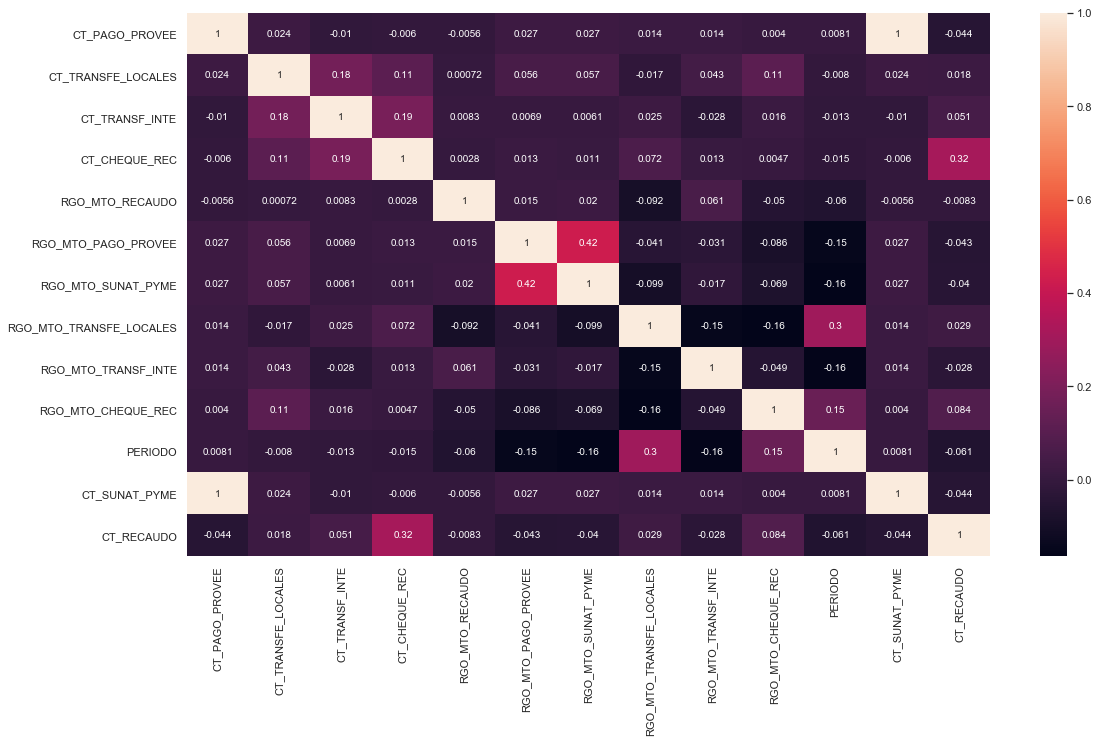

In [11]:
# Heatmap
plt.figure(figsize=(18,10))
sns.heatmap(df_transacciones[not_pk_cols].corr(),annot=True)

## Observaciones
Columnas de CT_SUNAT_PYME y CT_PAGO_PROVEE 
(Nro de transacciones sunat en el mes y  Nro de transacciones pago proveedores en el mes) --> CORR 1.

Además el rango que poseen es bastante alto. Si al final valores nulls son leak, podría tratarse de la misma información.

# Análisis de valores NULOS. Luego validaremos con target.

In [13]:
# RGO_MTO_SUNAT_PYME
df_transacciones.RGO_MTO_SUNAT_PYME.value_counts(dropna=False).sort_index()

1     4310
2     4182
3     4075
4     4185
5     4135
6     4122
7     4150
8     4201
9     4283
10    4196
11    4163
12    4191
13    4329
14    4160
15    4104
16    4156
17    2345
18    2662
19    2338
20    2722
Name: RGO_MTO_SUNAT_PYME, dtype: int64

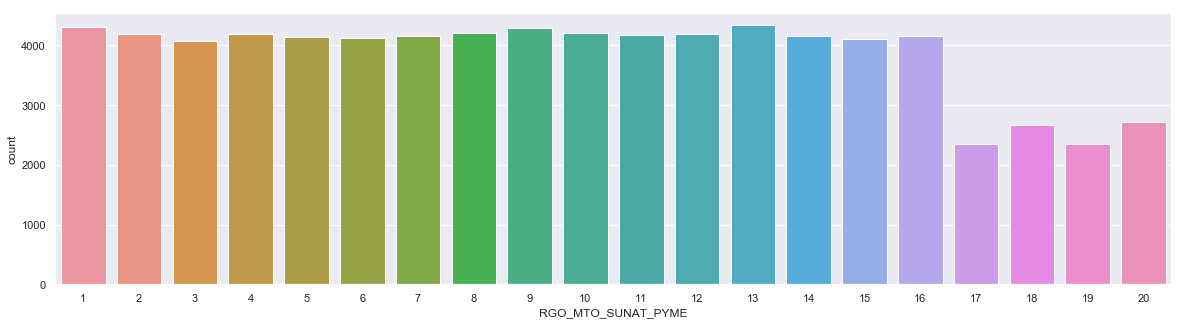

In [14]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_MTO_SUNAT_PYME', data = df_transacciones) 

In [17]:
#RGO_MTO_PAGO_PROVEE
df_transacciones.RGO_MTO_PAGO_PROVEE.value_counts(dropna=False).sort_index()

1     4266
2     4357
3     4117
4     4092
5     4275
6     4350
7     4102
8     4081
9     4276
10    4276
11    4003
12    4070
13    4354
14    4304
15    4120
16    3930
17    2312
18    2664
19    2338
20    2722
Name: RGO_MTO_PAGO_PROVEE, dtype: int64

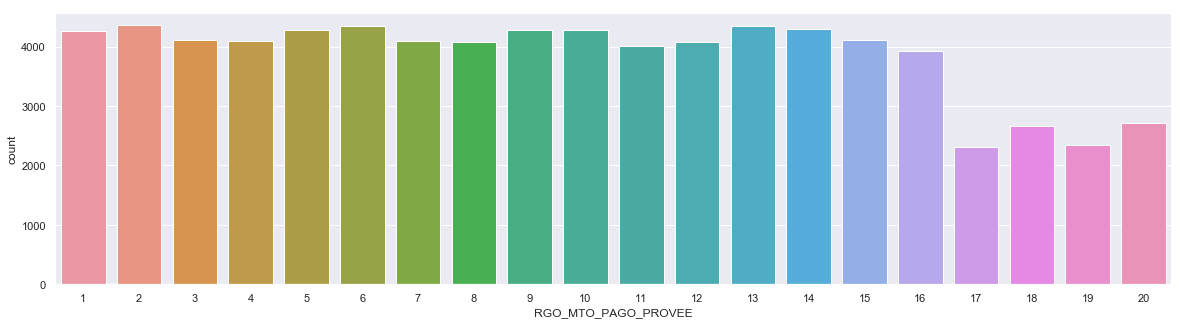

In [18]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_MTO_PAGO_PROVEE', data = df_transacciones) 

### Quitando los nulls para los dos grupos en sus campos de conteo de transacciones


In [19]:
# CT_SUNAT_PYME (no null) con RGO_MTO_SUNAT_PYME
df_transacciones[df_transacciones['CT_SUNAT_PYME'].notnull()].RGO_MTO_SUNAT_PYME.value_counts(dropna=False).sort_index()

17    1852
18    2662
19    2338
20    2722
Name: RGO_MTO_SUNAT_PYME, dtype: int64

In [20]:
# CT_PAGO_PROVEE (no null) con RGO_MTO_PAGO_PROVEE
df_transacciones[df_transacciones['CT_PAGO_PROVEE'].notnull()].RGO_MTO_PAGO_PROVEE.value_counts(dropna=False).sort_index()

17    1850
18    2664
19    2338
20    2722
Name: RGO_MTO_PAGO_PROVEE, dtype: int64

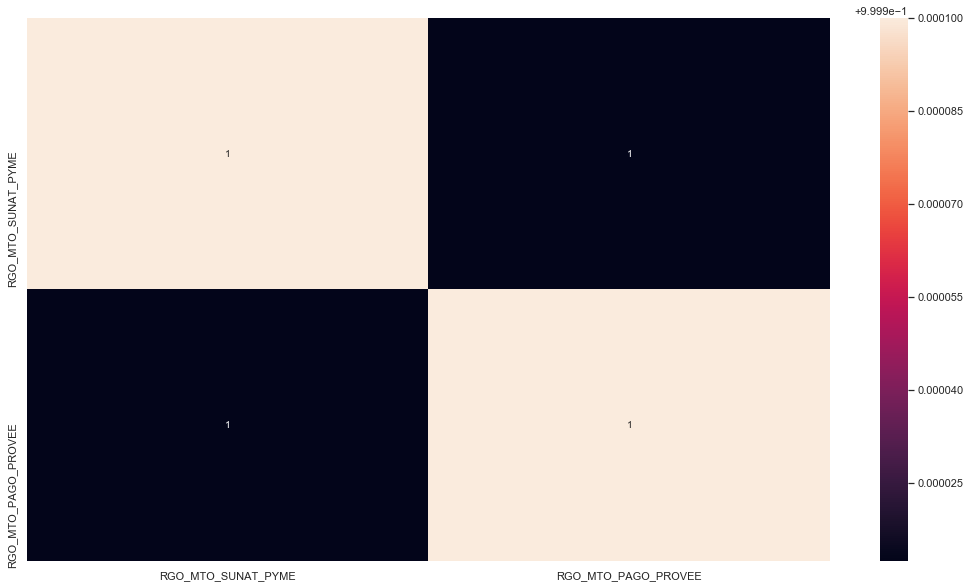

In [21]:
# Heatmap
plt.figure(figsize=(18,10))
sns.heatmap(df_transacciones[df_transacciones['CT_SUNAT_PYME'].notnull() &
                             df_transacciones['CT_PAGO_PROVEE'].notnull()]
                            [['RGO_MTO_SUNAT_PYME','RGO_MTO_PAGO_PROVEE']].corr(),annot=True)

## Data es la misma cuando no se toman en cuenta los nulls. COMPARAR con target. Podria ser un leak.

# Último análisis: POR MES.

In [22]:
df_transacciones.PERIODO.value_counts(dropna=False).sort_index()

201705      99
201706     402
201707    1018
201708    1053
201709    1104
201710    1093
201711    1115
201712    1116
201801    1142
201802    1025
201803    1143
201804    1176
201805    1223
201806    1183
201807    8929
201808    8910
201809    8772
201810    9251
201811    9190
201812    9113
201901    8952
Name: PERIODO, dtype: int64

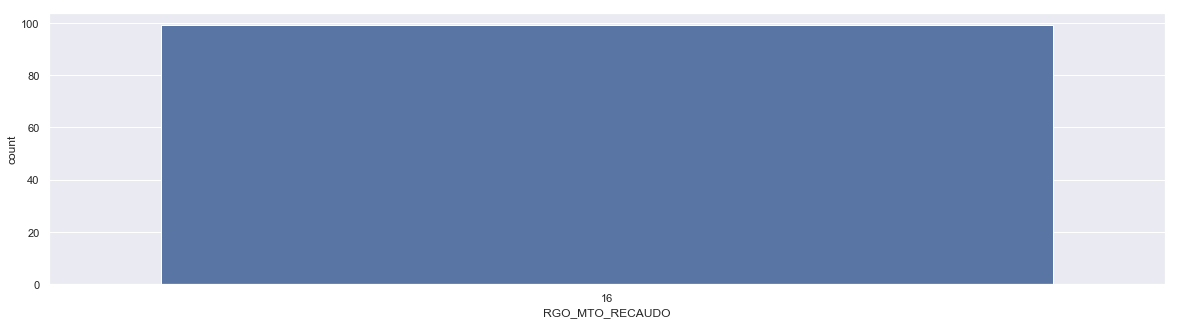

In [25]:
#Veremos tranferencias y monto de RECAUDO como ejemplo

# 201705

plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_MTO_RECAUDO', data = df_transacciones[df_transacciones['PERIODO']==201705])

In [26]:
df_transacciones[df_transacciones['PERIODO']==201705].CT_RECAUDO.value_counts(dropna=False).sort_index()

NaN    99
Name: CT_RECAUDO, dtype: int64

In [27]:
df_transacciones[df_transacciones['PERIODO']==201705].ID_CLIENTE.value_counts(dropna=False).sort_index()

910      1
2505     1
2523     1
6923     1
7424     1
12060    1
12814    1
14633    1
15871    1
16449    1
16473    1
17830    1
19185    1
19345    1
19520    1
19909    1
20150    1
20188    1
20445    1
20556    1
21230    1
21351    1
21930    1
22317    1
23468    1
25914    1
26673    1
26756    1
29079    1
29536    1
        ..
72074    1
74996    1
75047    1
76539    1
77280    1
77960    1
79318    1
79750    1
80746    1
81420    1
83125    1
83180    1
85391    1
85944    1
87387    1
88059    1
88500    1
89233    1
89668    1
91722    1
93083    1
93547    1
93922    1
94054    1
95020    1
95554    1
95615    1
95669    1
97515    1
98245    1
Name: ID_CLIENTE, Length: 99, dtype: int64

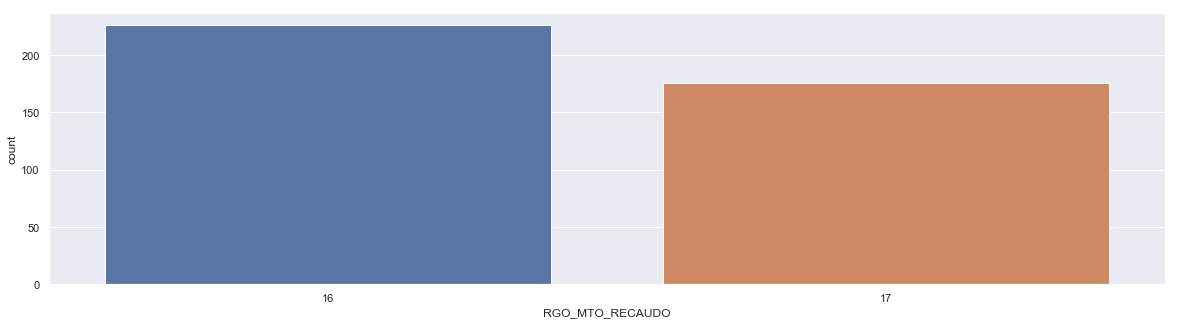

In [28]:
# 201706

plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_MTO_RECAUDO', data = df_transacciones[df_transacciones['PERIODO']==201706])

In [30]:
df_transacciones[df_transacciones['PERIODO']==201706].CT_RECAUDO.value_counts(dropna=False).sort_index()

NaN    402
Name: CT_RECAUDO, dtype: int64

In [31]:
df_transacciones[df_transacciones['PERIODO']==201706].ID_CLIENTE.value_counts(dropna=False).sort_index()

910      1
1359     1
1480     1
2346     1
2502     1
2505     1
2523     1
2792     1
2808     1
3075     1
3171     1
3692     1
4444     1
5537     1
5749     1
5879     1
6437     1
6805     1
6890     1
6923     1
6955     1
6981     1
7233     1
7424     1
8177     1
9616     1
9718     1
10864    1
11218    1
11429    1
        ..
93922    1
94054    1
94600    1
95020    1
95267    1
95431    1
95554    1
95580    1
95615    1
95669    1
95695    1
96116    1
96182    1
96651    1
96848    1
96964    1
97515    1
97736    1
98135    1
98138    1
98245    1
98385    1
98467    1
98511    1
98614    1
98984    1
99446    1
99493    1
99569    1
99827    1
Name: ID_CLIENTE, Length: 402, dtype: int64

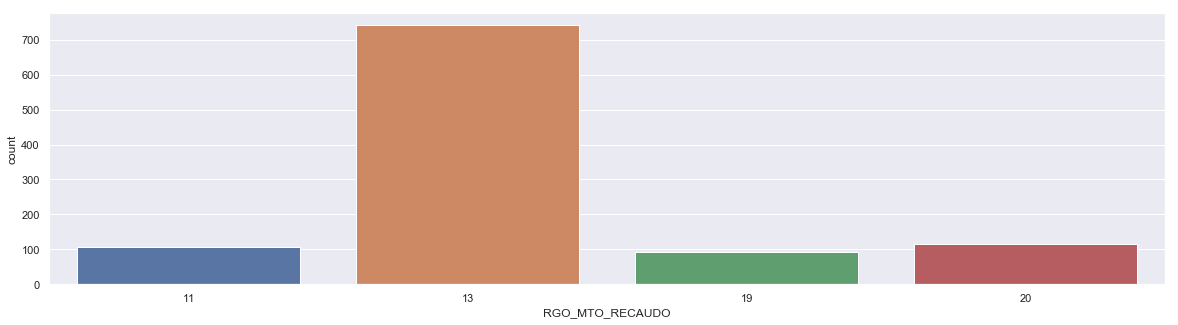

In [32]:
# Aquí la distribución es diferente.

# 201708

plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_MTO_RECAUDO', data = df_transacciones[df_transacciones['PERIODO']==201708])

In [33]:
df_transacciones[df_transacciones['PERIODO']==201708].CT_RECAUDO.value_counts(dropna=False).sort_index()

1.0       27
2.0       13
3.0       19
4.0       11
5.0        7
6.0       12
7.0        4
8.0        4
9.0        4
10.0       1
11.0       2
12.0       3
13.0       2
14.0       1
15.0       3
17.0       4
18.0       5
19.0       3
20.0       1
22.0       2
25.0       1
26.0       2
28.0       3
30.0       1
36.0       1
38.0       1
39.0       1
42.0       1
43.0       1
44.0       1
        ... 
141.0      1
152.0      1
156.0      1
176.0      1
185.0      1
189.0      1
190.0      2
200.0      2
206.0      1
208.0      1
210.0      1
230.0      1
233.0      1
288.0      1
294.0      1
298.0      1
374.0      1
380.0      1
429.0      1
470.0      1
487.0      2
503.0      1
563.0      1
602.0      1
637.0      2
655.0      1
660.0      1
731.0      1
934.0      1
NaN      847
Name: CT_RECAUDO, Length: 87, dtype: int64

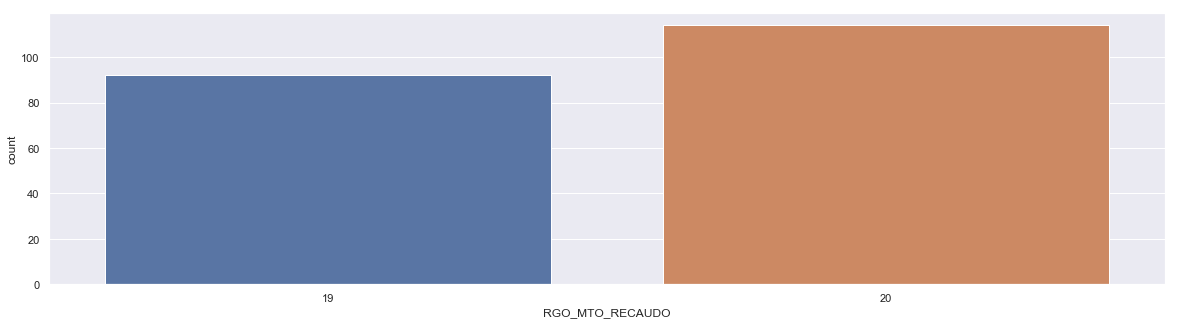

In [34]:
# Entonces, que significan esos nulls? Primera transferencia? o transacciones RECIBIDAS! (:o) ? uhm...

# Viendo solo los que tienen contador en nulo.
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_MTO_RECAUDO', 
                     data = df_transacciones[(df_transacciones['PERIODO']==201708) & (df_transacciones['CT_RECAUDO'].notnull())])

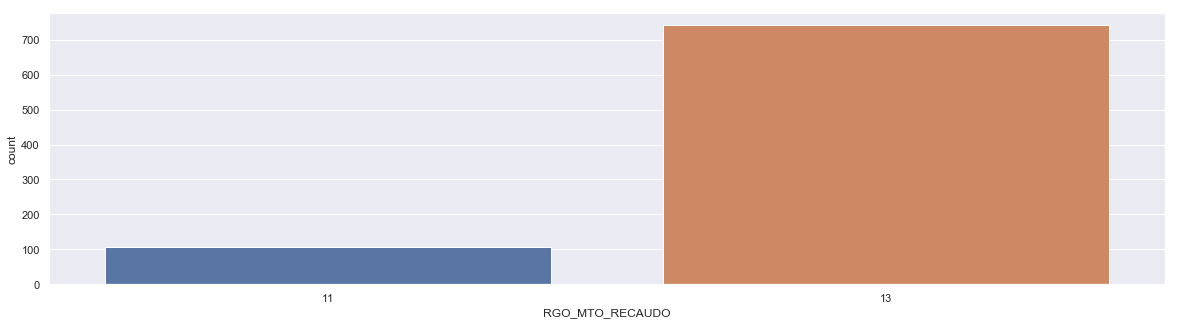

In [35]:
# Viendo solo los que tienen contador en nulo.
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_MTO_RECAUDO', 
                     data = df_transacciones[(df_transacciones['PERIODO']==201708) & (df_transacciones['CT_RECAUDO'].isnull())])

# Granularidad. Aquí podríamos tener un verdadero significado de los contadores en nulo.

In [37]:
df_transacciones.sort_values(["ID_CLIENTE","PERIODO"], inplace = True)
bool_series = df_transacciones[["ID_CLIENTE","PERIODO"]].duplicated()
df_transacciones[bool_series] 

,PERIODO,ID_CLIENTE,CT_RECAUDO,RGO_MTO_RECAUDO,CT_TRANSF_INTE,RGO_MTO_TRANSF_INTE,CT_CHEQUE_REC,RGO_MTO_CHEQUE_REC,CT_TRANSFE_LOCALES,RGO_MTO_TRANSFE_LOCALES,CT_PAGO_PROVEE,RGO_MTO_PAGO_PROVEE,CT_SUNAT_PYME,RGO_MTO_SUNAT_PYME


### No hay repetidos. Revisaremos la historia de un cliente en periodos recientes para revisar comportamiento de nulos.

In [39]:
df_transacciones[(df_transacciones['PERIODO']==201901)]

,PERIODO,ID_CLIENTE,CT_RECAUDO,RGO_MTO_RECAUDO,CT_TRANSF_INTE,RGO_MTO_TRANSF_INTE,CT_CHEQUE_REC,RGO_MTO_CHEQUE_REC,CT_TRANSFE_LOCALES,RGO_MTO_TRANSFE_LOCALES,CT_PAGO_PROVEE,RGO_MTO_PAGO_PROVEE,CT_SUNAT_PYME,RGO_MTO_SUNAT_PYME
14799,201901,8,NaN,4,NaN,17,NaN,9,561.0,20,NaN,14,NaN,4
33621,201901,31,NaN,13,NaN,13,5049.0,20,561.0,11,NaN,9,NaN,9
25999,201901,50,NaN,9,NaN,1,NaN,4,1122.0,8,NaN,6,NaN,8
44742,201901,51,NaN,4,NaN,2,1683.0,17,NaN,6,NaN,13,NaN,11
1635,201901,58,NaN,17,NaN,9,204.0,16,NaN,7,NaN,2,NaN,2
36178,201901,60,NaN,10,NaN,9,NaN,11,12903.0,17,NaN,7,NaN,9
3800,201901,65,NaN,1,NaN,5,11220.0,15,NaN,3,NaN,2,NaN,1
13289,201901,66,NaN,6,NaN,17,NaN,4,510.0,15,NaN,11,NaN,4
52830,201901,75,NaN,4,1.0,20,NaN,7,NaN,4,NaN,9,NaN,13
6746,201901,76,NaN,13,NaN,13,16269.0,14,5610.0,15,NaN,14,NaN,2


### Historia del cliente 8

In [40]:
df_transacciones[(df_transacciones['ID_CLIENTE']==8)].sort_values(by=['PERIODO']) 
# Tiene todos los valores de conteo en transferencias locales.

,PERIODO,ID_CLIENTE,CT_RECAUDO,RGO_MTO_RECAUDO,CT_TRANSF_INTE,RGO_MTO_TRANSF_INTE,CT_CHEQUE_REC,RGO_MTO_CHEQUE_REC,CT_TRANSFE_LOCALES,RGO_MTO_TRANSFE_LOCALES,CT_PAGO_PROVEE,RGO_MTO_PAGO_PROVEE,CT_SUNAT_PYME,RGO_MTO_SUNAT_PYME
37629,201808,8,NaN,13,NaN,9,NaN,4,561.0,14,NaN,4,NaN,10
20181,201809,8,NaN,3,NaN,4,NaN,6,561.0,11,NaN,9,NaN,5
2672,201811,8,NaN,1,NaN,6,NaN,2,1122.0,15,NaN,10,NaN,1
14799,201901,8,NaN,4,NaN,17,NaN,9,561.0,20,NaN,14,NaN,4


### Historia del cliente 31

In [41]:
df_transacciones[(df_transacciones['ID_CLIENTE']==31)].sort_values(by=['PERIODO']) 
# Tiene conteo de cheques y un null en transf locales.

,PERIODO,ID_CLIENTE,CT_RECAUDO,RGO_MTO_RECAUDO,CT_TRANSF_INTE,RGO_MTO_TRANSF_INTE,CT_CHEQUE_REC,RGO_MTO_CHEQUE_REC,CT_TRANSFE_LOCALES,RGO_MTO_TRANSFE_LOCALES,CT_PAGO_PROVEE,RGO_MTO_PAGO_PROVEE,CT_SUNAT_PYME,RGO_MTO_SUNAT_PYME
6495,201807,31,NaN,2,NaN,15,7293.0,14,561.0,11,NaN,12,NaN,1
26725,201808,31,NaN,11,NaN,9,6171.0,19,1122.0,14,NaN,8,NaN,8
11407,201809,31,NaN,8,NaN,11,3927.0,19,NaN,6,NaN,12,NaN,4
15641,201810,31,NaN,1,NaN,6,11781.0,14,1122.0,18,NaN,10,NaN,4
28419,201811,31,NaN,7,NaN,5,3366.0,18,1683.0,14,NaN,12,NaN,8
68682,201812,31,NaN,4,NaN,5,5610.0,19,561.0,11,NaN,13,NaN,16
33621,201901,31,NaN,13,NaN,13,5049.0,20,561.0,11,NaN,9,NaN,9


### Historia del cliente 99989

In [42]:
df_transacciones[(df_transacciones['ID_CLIENTE']==99989)].sort_values(by=['PERIODO']) 

,PERIODO,ID_CLIENTE,CT_RECAUDO,RGO_MTO_RECAUDO,CT_TRANSF_INTE,RGO_MTO_TRANSF_INTE,CT_CHEQUE_REC,RGO_MTO_CHEQUE_REC,CT_TRANSFE_LOCALES,RGO_MTO_TRANSFE_LOCALES,CT_PAGO_PROVEE,RGO_MTO_PAGO_PROVEE,CT_SUNAT_PYME,RGO_MTO_SUNAT_PYME
23377,201807,99989,40.0,20,NaN,18,10098.0,20,8874.0,8,NaN,16,NaN,7
45689,201808,99989,65.0,19,NaN,3,23256.0,16,13464.0,9,NaN,1,NaN,11
57514,201809,99989,56.0,19,NaN,16,18054.0,15,22032.0,17,NaN,10,NaN,15
24681,201810,99989,46.0,20,NaN,3,5508.0,18,17442.0,9,NaN,1,NaN,7
27511,201811,99989,49.0,20,NaN,2,12546.0,15,21726.0,12,NaN,11,NaN,8
12025,201812,99989,44.0,20,NaN,15,42534.0,19,16830.0,11,NaN,12,NaN,4
39764,201901,99989,42.0,20,NaN,12,14076.0,20,16830.0,10,NaN,9,NaN,11


### Historia del cliente 206

In [44]:
df_transacciones[(df_transacciones['ID_CLIENTE']==206)].sort_values(by=['PERIODO']) 

,PERIODO,ID_CLIENTE,CT_RECAUDO,RGO_MTO_RECAUDO,CT_TRANSF_INTE,RGO_MTO_TRANSF_INTE,CT_CHEQUE_REC,RGO_MTO_CHEQUE_REC,CT_TRANSFE_LOCALES,RGO_MTO_TRANSFE_LOCALES,CT_PAGO_PROVEE,RGO_MTO_PAGO_PROVEE,CT_SUNAT_PYME,RGO_MTO_SUNAT_PYME
33875,201807,206,NaN,2,NaN,9,5610.0,14,5049.0,10,NaN,11,NaN,9
13225,201808,206,NaN,2,NaN,8,4488.0,16,2244.0,20,NaN,9,NaN,4
76956,201809,206,NaN,8,NaN,13,2244.0,18,2805.0,19,NaN,16,NaN,2
28573,201810,206,NaN,1,NaN,17,NaN,2,8415.0,16,NaN,14,NaN,8
32645,201811,206,NaN,7,NaN,8,NaN,13,2244.0,13,NaN,12,NaN,7
66011,201812,206,NaN,4,NaN,8,NaN,11,2244.0,14,583.0,17,583.0,17
70810,201901,206,NaN,13,NaN,15,NaN,6,8976.0,17,1089.0,19,1089.0,19


#### El conteo tiene bastantes valores en Nulo. Habría que ver como llenarlo o en su defecto sòlo usar rangos.